In [16]:
import sys
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import shap
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, roc_curve, auc

In [19]:
data = pd.read_csv("库存合并3.csv")
            
print(data)

      dfsdev2     BETAP  PLHI2/1000  PNBI1LSOURCE/1000  PNBI1RSOURCE/1000  \
0    3.786213  1.809148    1.771008          -0.000024       1.980000e-06   
1    3.814039  1.872722    1.764905          -0.000002      -4.110000e-07   
2    3.902733  1.913145    1.764600           0.000090       8.510000e-08   
3    3.877649  1.988600    1.766736          -0.000053       1.400000e-07   
4    3.836375  2.058595    1.759717          -0.000014      -8.030000e-08   
..        ...       ...         ...                ...                ...   
832  6.148488  1.017720    1.787335           1.660275       1.671050e-04   
833  7.403863  1.226287    1.784894           1.631289       1.964820e-04   
834  7.175847  1.266651    1.791302           1.653335      -1.326190e-04   
835  6.604383  1.405230    1.788556           1.659220       3.190000e-05   
836  6.053979  1.500407    1.785199           1.652635       1.251610e-04   

     PNBI2LSOURCE/1000  PNBI2RSOURCE/1000     KAPPA    AMINOR       Q95  \


In [20]:
row_0 = list(data.loc[0])
row_num = data.iloc[:,0].size

print("data len: {}".format(len(row_0)))
print("row_num: {}".format(row_num))

y_list = []   # 用于存放标签数据
x_list = []   # 用于存放特征数据
for i in range(row_num):
    row_data_list = list(data.loc[i])
    y_list.append(row_data_list[0])
    x_list.append(row_data_list[1:])

# 将数据类型由 list 转换为 array
x_array = np.array(x_list)
y_array = np.array(y_list)

print("x_array shape: {}".format(x_array.shape))
print("y_array shape: {}".format(y_array.shape))
print("==================== Column Name ====================")
print(list(data.columns))


data len: 16
row_num: 837
x_array shape: (837, 15)
y_array shape: (837,)
==================== Column Name ====================
['dfsdev2', 'BETAP', 'PLHI2/1000', 'PNBI1LSOURCE/1000', 'PNBI1RSOURCE/1000', 'PNBI2LSOURCE/1000', 'PNBI2RSOURCE/1000', 'KAPPA', 'AMINOR', 'Q95', 'TRITOP', 'TRIBOT', 'DRSEP', 'WUta', 'pcrl01/1000000', 'pecrh']


In [21]:
# test_size=0.2   设置测试集的样本数量为全部样呗的 20%
# random_state=12 设置随机种子为 12
# shuffle=True    打乱样本数据的顺序
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.2, random_state=42, shuffle=True)
# 特征归一化
scaler = StandardScaler()
x_array = scaler.fit_transform(x_array)
x_array = scaler.transform(x_array)
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test  shape: {}".format(x_test.shape))
print("y_test  shape: {}".format(y_test.shape))

x_train shape: (669, 15)
y_train shape: (669,)
x_test  shape: (168, 15)
y_test  shape: (168,)


In [22]:
# n_estimators：森林中决策树的数量
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)



RandomForestRegressor(random_state=42)

In [23]:

predict_value = rf.predict(x_test)
for idx,value in enumerate(predict_value):
    print("[predict]: idx = {}, label = {}, predict = {}".format(idx, y_test[idx], value))
 

[predict]: idx = 0, label = 5.346746727, predict = 5.35264452117
[predict]: idx = 1, label = 7.263970474, predict = 6.833609471669998
[predict]: idx = 2, label = 4.32791383, predict = 4.3772218680499995
[predict]: idx = 3, label = 3.912047668, predict = 4.041139062039997
[predict]: idx = 4, label = 4.781760587, predict = 4.88012868067
[predict]: idx = 5, label = 4.897347904, predict = 5.488652054920005
[predict]: idx = 6, label = 4.99620454, predict = 5.077494481499998
[predict]: idx = 7, label = 6.114242622, predict = 5.912934177990007
[predict]: idx = 8, label = 6.184800521, predict = 6.567949667349996
[predict]: idx = 9, label = 6.048325901, predict = 6.101270475050003
[predict]: idx = 10, label = 4.92296378, predict = 5.4319418545100016
[predict]: idx = 11, label = 4.692487038, predict = 5.1585163191399985
[predict]: idx = 12, label = 5.105937454, predict = 5.13104776764
[predict]: idx = 13, label = 3.965280549, predict = 4.223910484149996
[predict]: idx = 14, label = 6.016132037, 

In [24]:
# 计算均方差
mse = mean_squared_error(y_test,predict_value)

    # 记录均方差
#mse_list.append(mse)

# 输出均方差
print(f"Mean squared error: {mse}")

Mean squared error: 0.11282878359150297


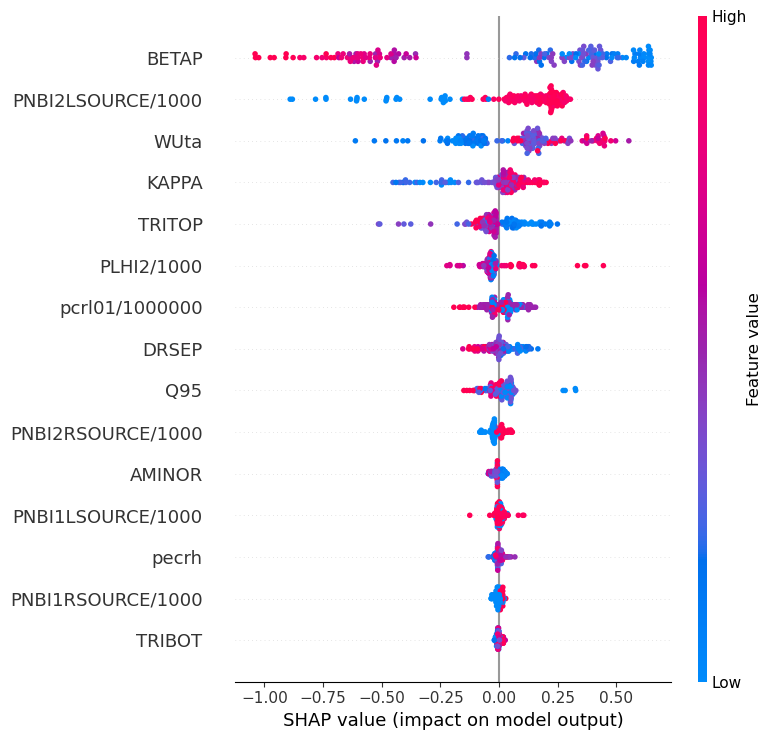

In [25]:
# 我们记录在文件中的数据的特征参数名称
columns_name_list = [  'BETAP', 'PLHI2/1000', 'PNBI1LSOURCE/1000', 'PNBI1RSOURCE/1000', 'PNBI2LSOURCE/1000', 'PNBI2RSOURCE/1000', 'KAPPA', 'AMINOR', 'Q95',  'TRITOP', 'TRIBOT', 'DRSEP',  'WUta', 'pcrl01/1000000', 'pecrh']
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=columns_name_list)


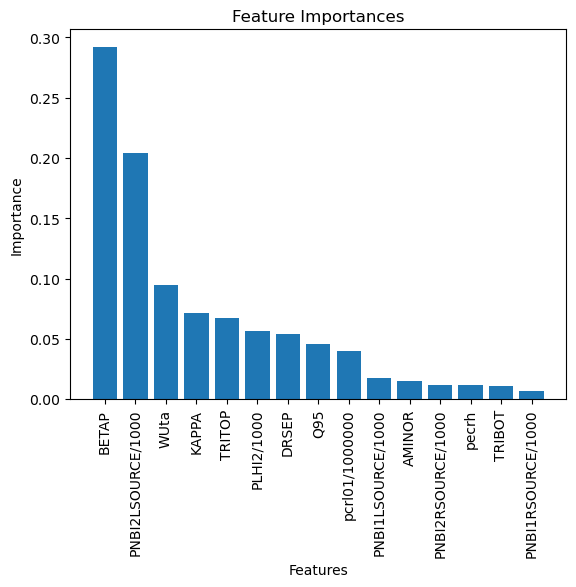

In [26]:
importances = rf.feature_importances_
# 可视化特征的影响度
feature_names = data.columns[1:24]  # 特征名称
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(x_array.shape[1]), importances[indices])
plt.xticks(range(x_array.shape[1]), feature_names[indices], rotation=90)  # 设置 x 轴标签
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

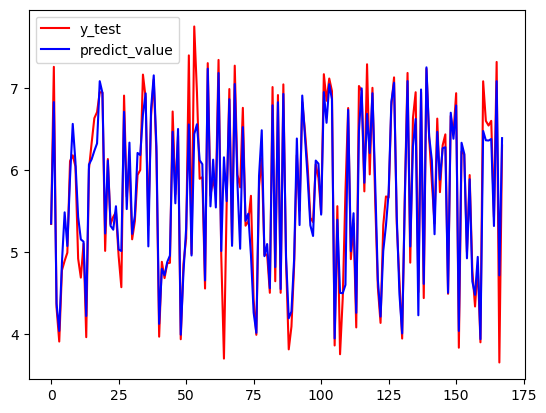

In [27]:
x = range(len(y_test))

plt.plot(x, y_test, color='red', linestyle='-', label='y_test')
plt.plot(x, predict_value, color='blue', linestyle='-', label='predict_value')
plt.legend()
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, x_array, y_array, cv=5 ,scoring = "neg_mean_squared_error")

array([-0.28352585, -0.20723206, -0.30116588, -0.29526874, -0.76720652])

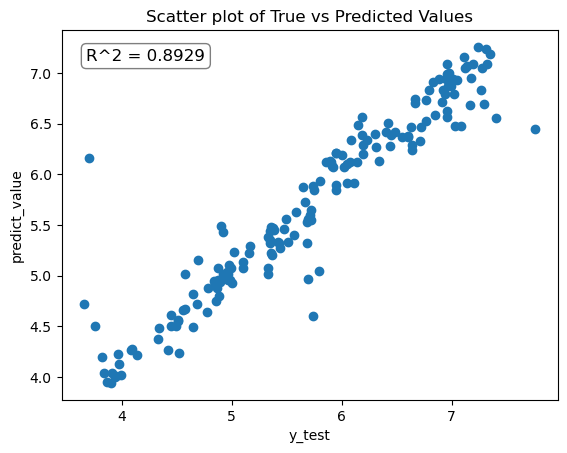

In [31]:


# 计算R方
r2 = r2_score(y_test, predict_value)


# 创建散点图
plt.scatter(y_test,predict_value)
plt.xlabel('y_test')
plt.ylabel('predict_value')
plt.title('Scatter plot of True vs Predicted Values')

# 添加R方文本框
plt.text(0.05, 0.95, f'R^2 = {r2:.4f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()

In [33]:
for i, tree in enumerate(rf.estimators_):
    max_depth = tree.tree_.max_depth
    print(f"Tree {i+1} - Max Depth: {max_depth}")

Tree 1 - Max Depth: 19
Tree 2 - Max Depth: 18
Tree 3 - Max Depth: 16
Tree 4 - Max Depth: 18
Tree 5 - Max Depth: 24
Tree 6 - Max Depth: 18
Tree 7 - Max Depth: 19
Tree 8 - Max Depth: 19
Tree 9 - Max Depth: 15
Tree 10 - Max Depth: 17
Tree 11 - Max Depth: 18
Tree 12 - Max Depth: 18
Tree 13 - Max Depth: 17
Tree 14 - Max Depth: 16
Tree 15 - Max Depth: 16
Tree 16 - Max Depth: 17
Tree 17 - Max Depth: 19
Tree 18 - Max Depth: 16
Tree 19 - Max Depth: 19
Tree 20 - Max Depth: 18
Tree 21 - Max Depth: 20
Tree 22 - Max Depth: 20
Tree 23 - Max Depth: 19
Tree 24 - Max Depth: 15
Tree 25 - Max Depth: 18
Tree 26 - Max Depth: 17
Tree 27 - Max Depth: 18
Tree 28 - Max Depth: 21
Tree 29 - Max Depth: 16
Tree 30 - Max Depth: 17
Tree 31 - Max Depth: 19
Tree 32 - Max Depth: 18
Tree 33 - Max Depth: 17
Tree 34 - Max Depth: 17
Tree 35 - Max Depth: 20
Tree 36 - Max Depth: 17
Tree 37 - Max Depth: 20
Tree 38 - Max Depth: 15
Tree 39 - Max Depth: 19
Tree 40 - Max Depth: 16
Tree 41 - Max Depth: 18
Tree 42 - Max Depth: 18
T

In [34]:
# 假设你的随机森林模型对象为 model

# 获取模型参数字典
params =rf.get_params()

# 打印每个参数及其对应的值
for param, value in params.items():
    print(f"{param}: {value}")


bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False
